<a href="https://colab.research.google.com/github/prabhat7777/Bank_marketing_effectiveness/blob/main/Personal_Notebook_of_Bank_Marketing_Effectiveness_Prediction_Capstone_Project(Prabhat).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

##**Loading libraries and dataset**

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, log_loss, classification_report, precision_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Bank_marketing_effectiveness Prediction/Copy of bank-full.csv', sep= ';', engine= 'python')
 
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


###**Information about dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


###**Checking null in dataset**

In [ ]:
#checking null in dataset
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**No Null in dataset**

###**Summary statistics**

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

**As we can see classes are highly imbalanced**

In [ ]:
#checking number of unique values in dataset
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

###**List of Categorical columns**

In [ ]:
#collecting all the categorical columns in one list
cat_cols = list(df.select_dtypes(include=['object']))
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

###**List of numerical columns**

In [ ]:
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

##**Exploratory data analysis**

In [ ]:
#printing all the unique value of categorical column
def cat_col_unique(cat_cols):
  for item in cat_cols:
      print(df[item].unique())

###**Target variable count plot**

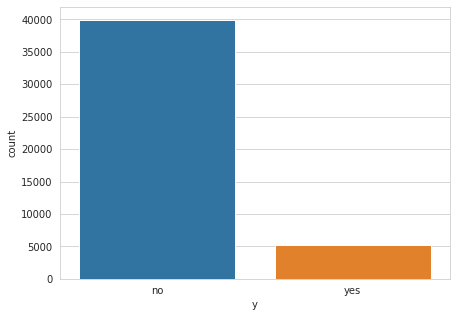

In [ ]:
sns.countplot(x=df['y'], data = df, )

**As we can see from graph that very few people have taken term deposit plan**

In [ ]:
cat_col_unique(cat_cols)

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'failure' 'other' 'success']
['no' 'yes']


###**Bar graph of categorical variables with respect to target variable**

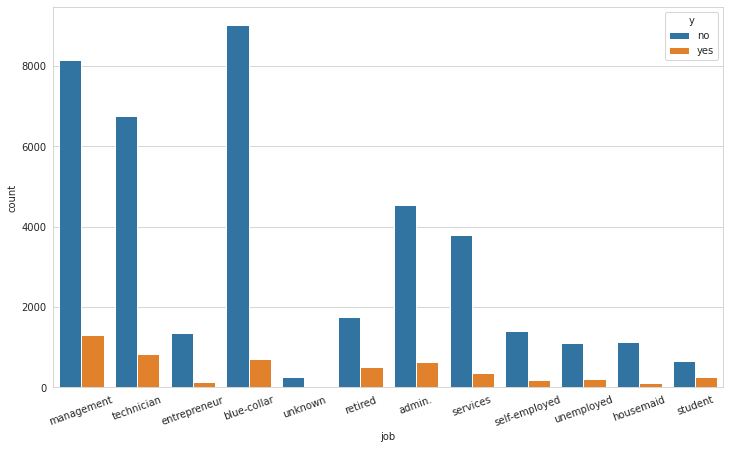

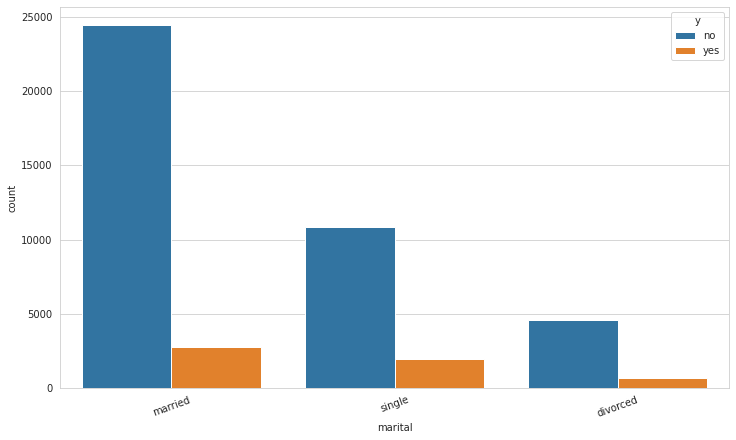

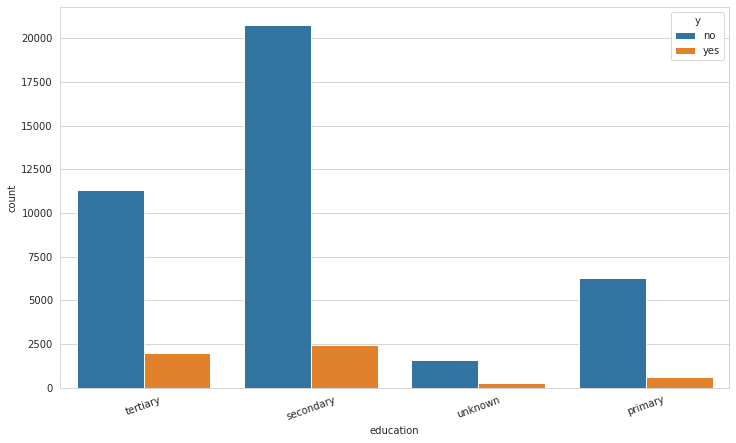

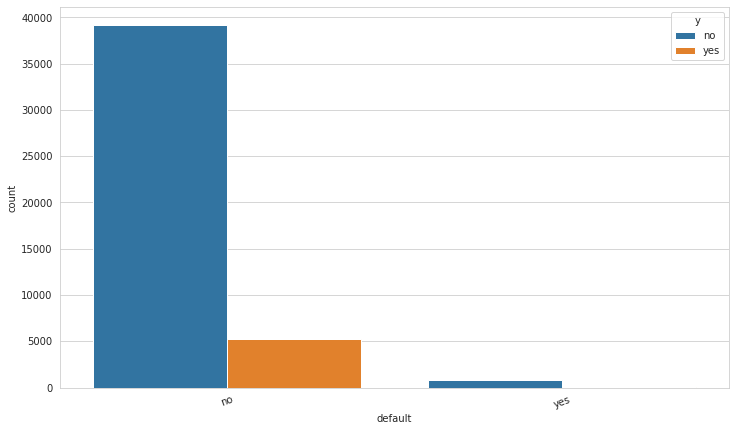

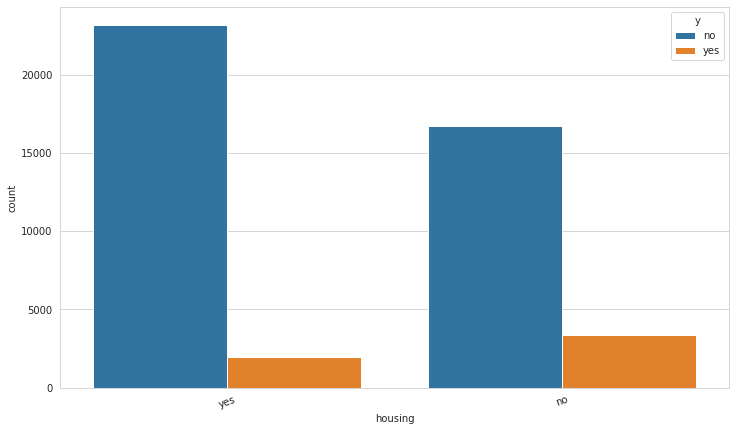

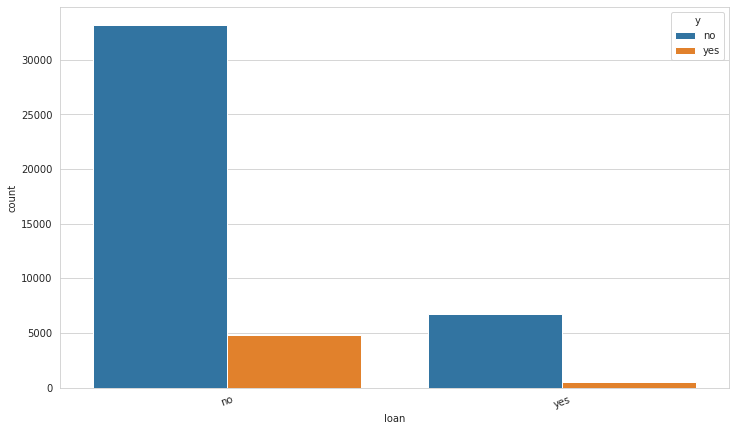

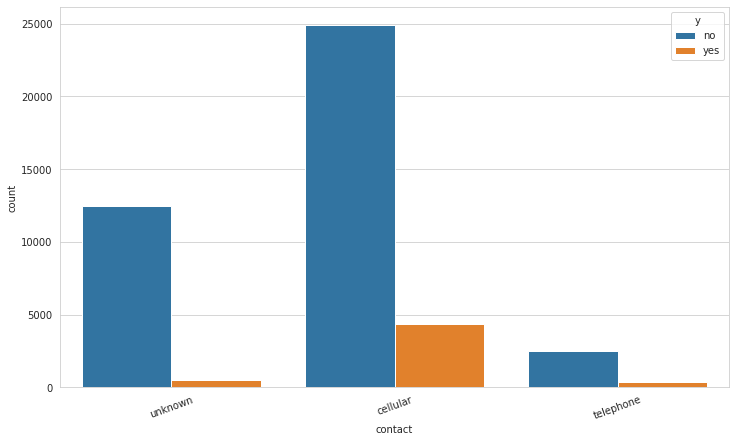

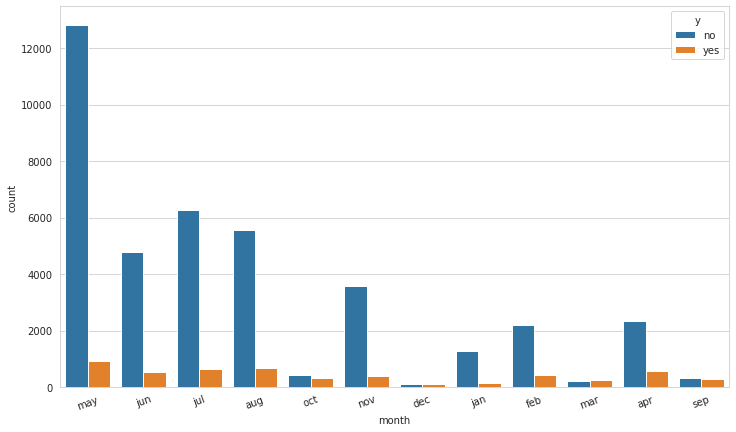

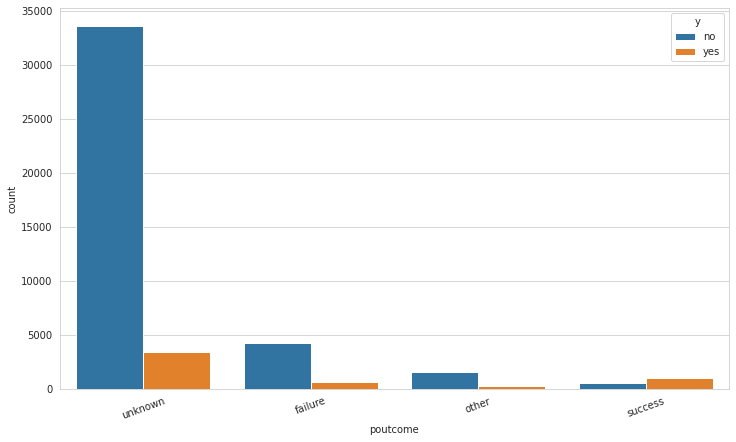

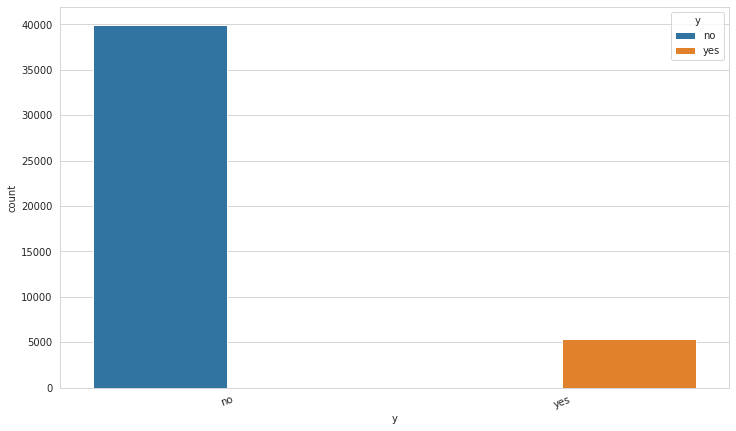

In [ ]:
#plotting all categorical columns
for item in cat_cols:
  sns.set_style("whitegrid")
  plt.figure(figsize=(12,7))
  sns.countplot(x=df[item], data = df, hue = df['y'])
  plt.xticks(rotation = 20)
  plt.show()  

###**Visualizing the categorical variable using pie chart with repect to target variable**

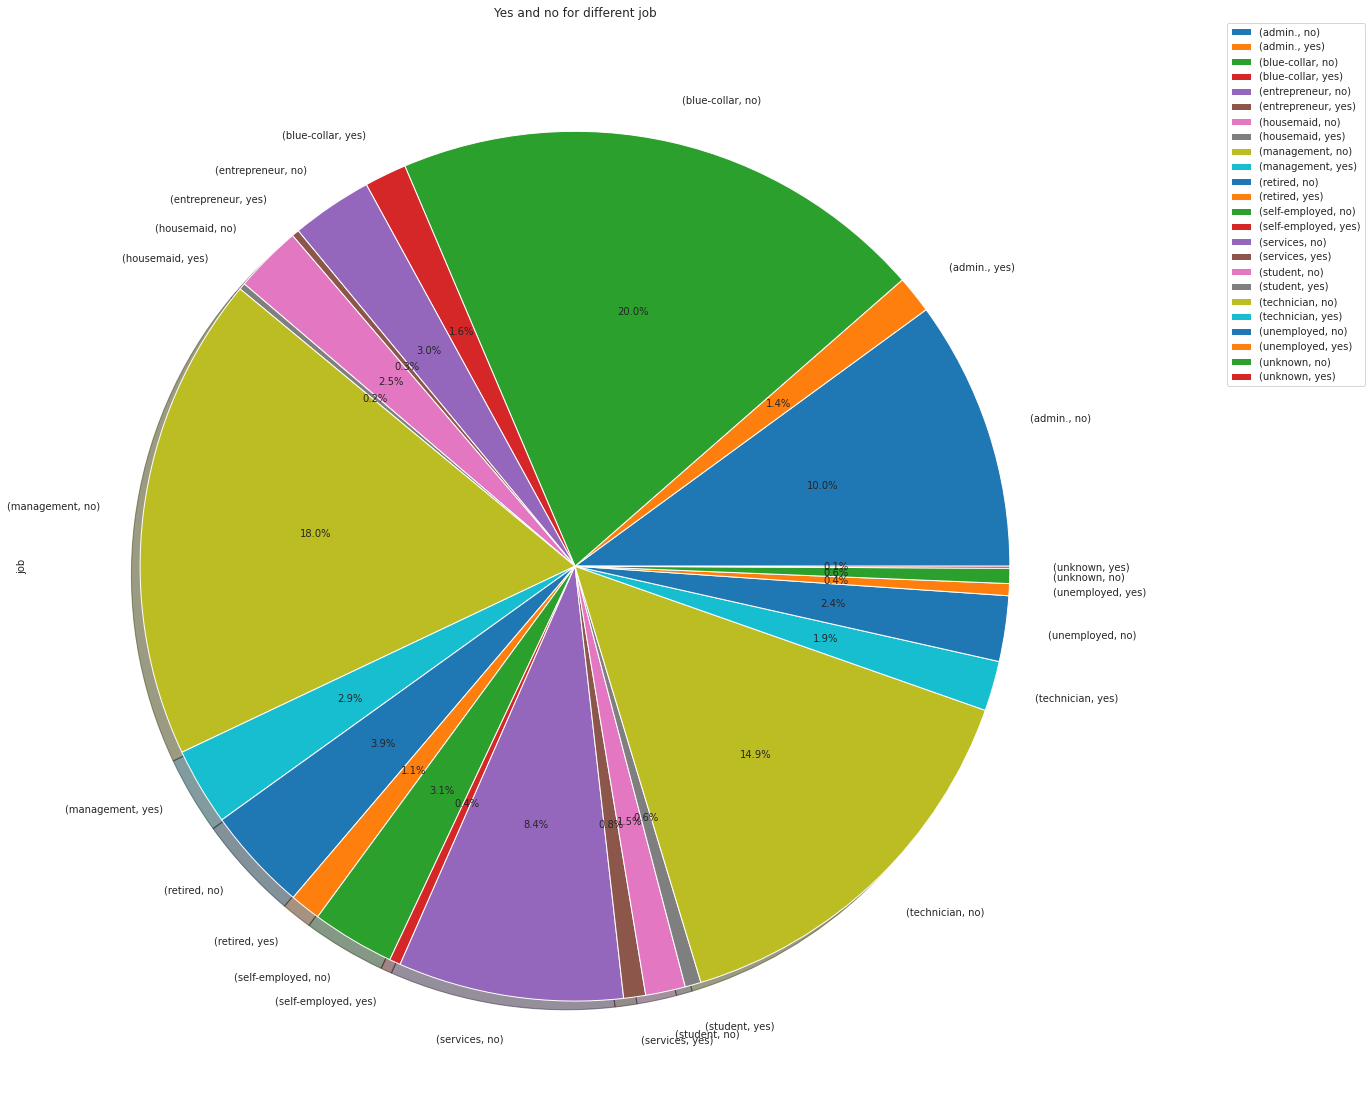

In [ ]:
#let's explore store type a bit and it's influence on sales
fig = plt.figure(figsize=(20, 20))
df.groupby(["job","y"])["job"].count().plot.pie(title='Yes and no for different job', legend=True, autopct='%1.1f%%', shadow=True)
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.show()


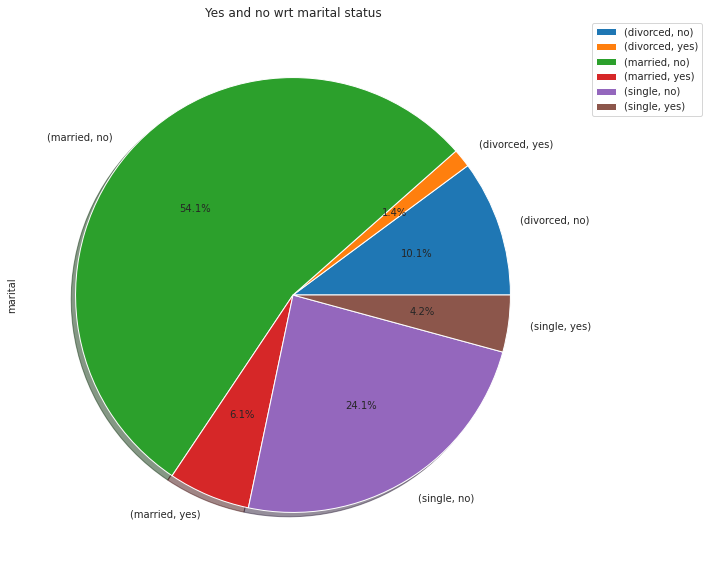

In [ ]:
fig = plt.figure(figsize=(12, 10))
df.groupby(["marital","y"])["marital"].count().plot.pie(title='Yes and no wrt marital status', legend=True, autopct='%1.1f%%', shadow=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

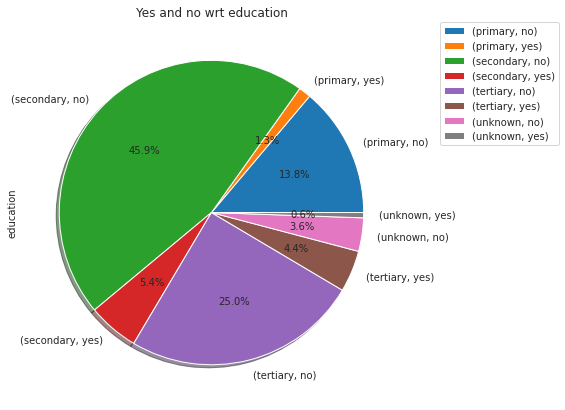

In [ ]:
fig = plt.figure(figsize=(12, 7))
df.groupby(["education","y"])["education"].count().plot.pie(title='Yes and no wrt education', legend=True, autopct='%1.1f%%', shadow=True)
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.show()

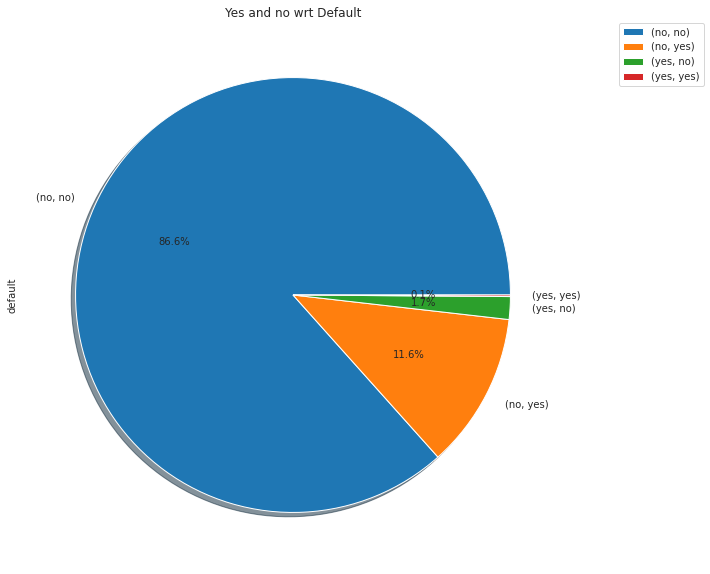

In [ ]:
fig = plt.figure(figsize=(15,10))
df.groupby(["default","y"])["default"].count().plot.pie(title='Yes and no wrt Default', legend=True, autopct='%1.1f%%', shadow=True)
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.show()

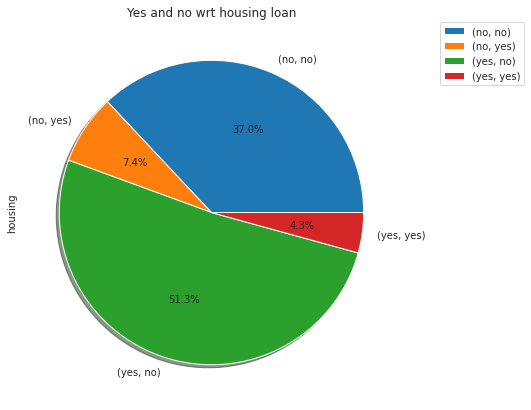

In [ ]:
fig = plt.figure(figsize=(12, 7))
df.groupby(["housing","y"])["housing"].count().plot.pie(title='Yes and no wrt housing loan', legend=True, autopct='%1.1f%%', shadow=True)
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.show()

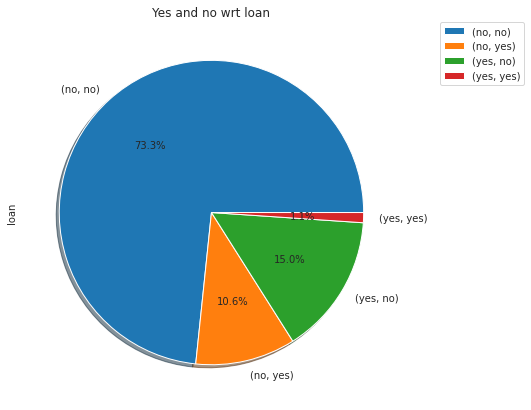

In [ ]:
fig = plt.figure(figsize=(12, 7))
df.groupby(["loan","y"])["loan"].count().plot.pie(title='Yes and no wrt loan', legend=True, autopct='%1.1f%%', shadow=True)
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.show()

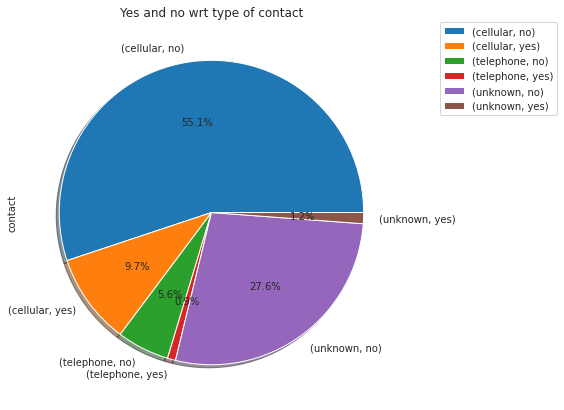

In [ ]:
fig = plt.figure(figsize=(12, 7))
df.groupby(["contact","y"])["contact"].count().plot.pie(title='Yes and no wrt type of contact', legend=True, autopct='%1.1f%%', shadow=True)
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.show()

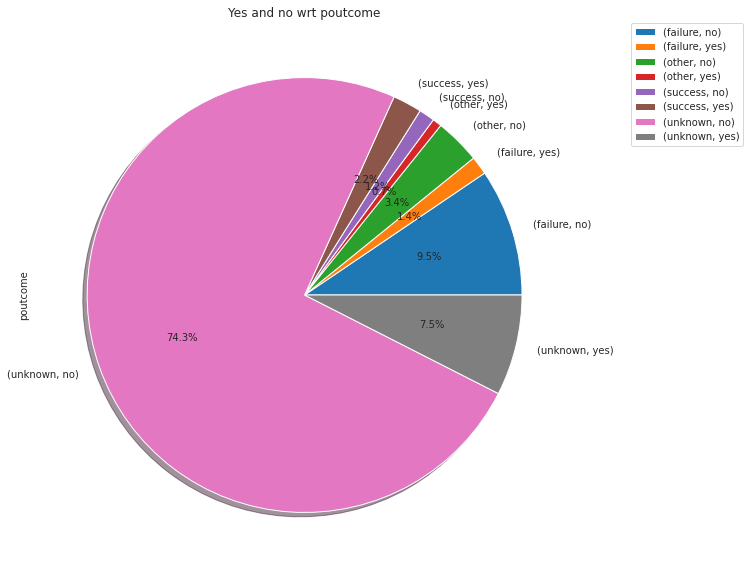

In [ ]:
fig = plt.figure(figsize=(12, 10))
df.groupby(["poutcome","y"])["poutcome"].count().plot.pie(title='Yes and no wrt poutcome', legend=True, autopct='%1.1f%%', shadow=True)
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.show()

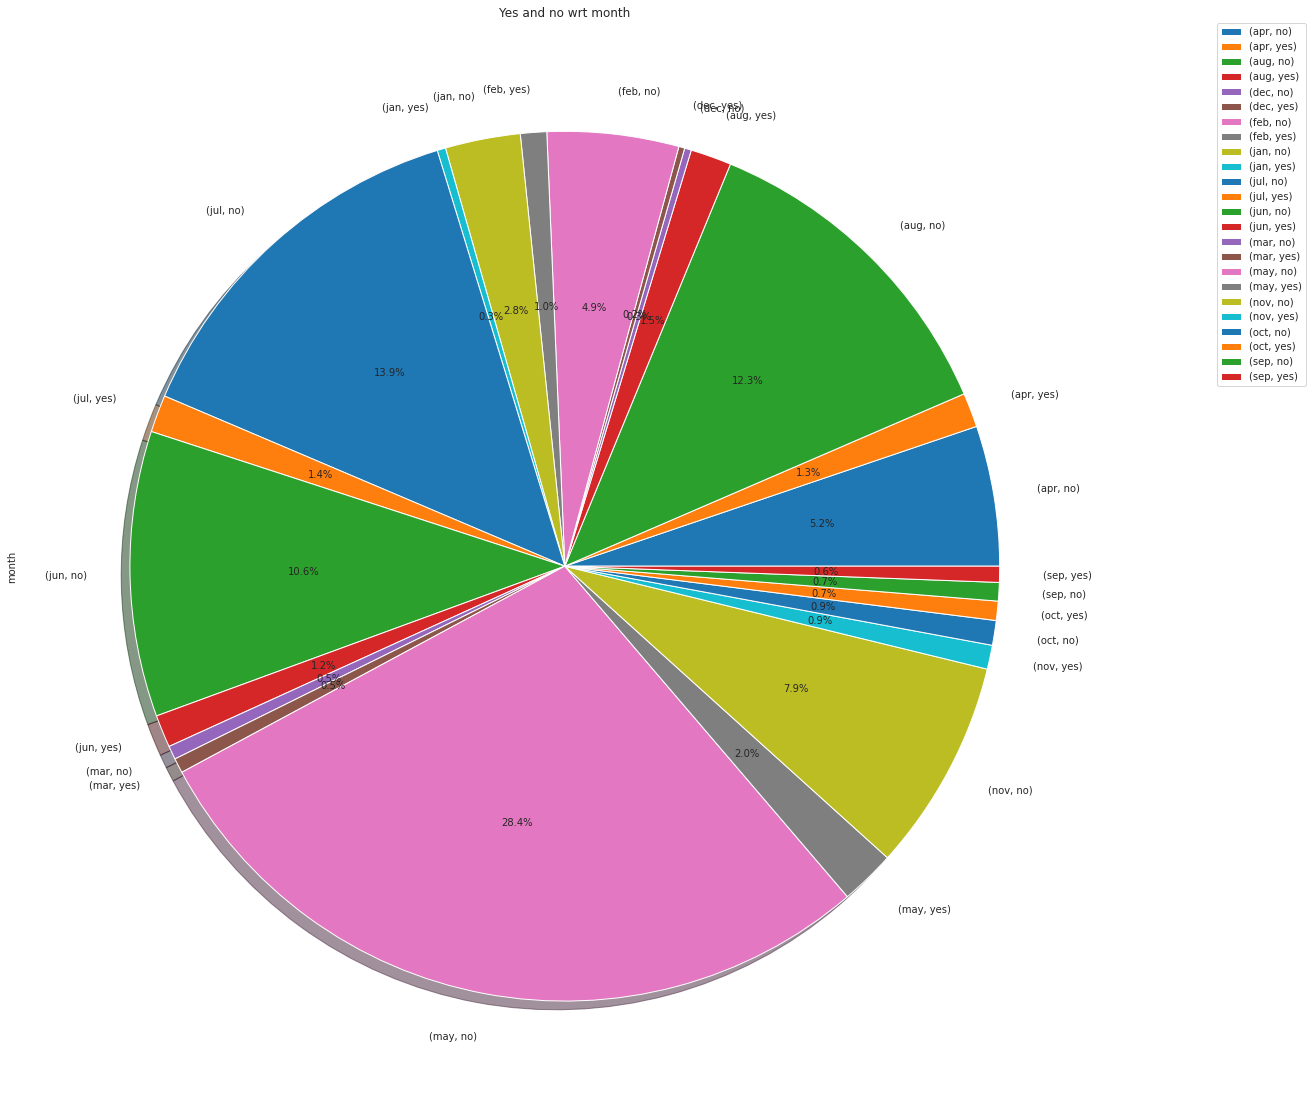

In [ ]:
fig = plt.figure(figsize=(20,20))
df.groupby(["month","y"])["month"].count().plot.pie(title='Yes and no wrt month', legend=True, autopct='%1.1f%%', shadow=True)
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.show()

**From the above plots we can analyze that:**

* Top contacted clients are from job type: 'blue-collar', 'management' & 'technician'.
* Success rate is highest for student.
* Most of the clients contacted have previous outcome as 'unknown'.
* Most of the clients (approx 1/3 of total) are contacted in the month of May but the success rate is only 6.7%.
* March has highest success rate.
* Most of the people are contacted through cellular.
* As seen for default variable, less client are contacted who have loan.
* Very few clients are contacted who are defaulter.
* Most of the people who are contacted have tertiray or secondary education.
* As we can see that married people are more tend to invest in product and have subscribed more in comparison to others.

###**Histogram of numerical features**

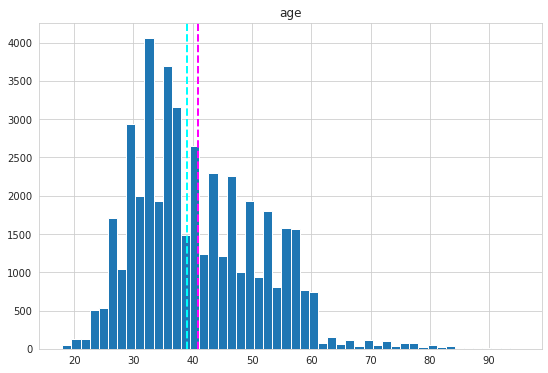

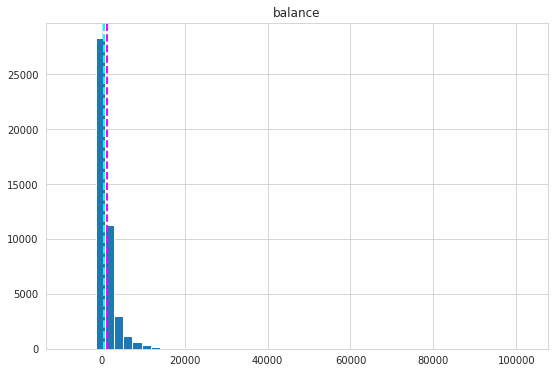

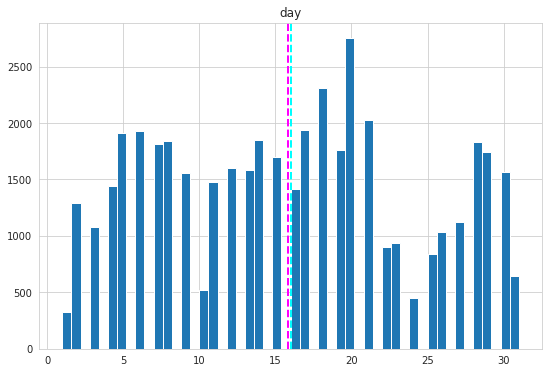

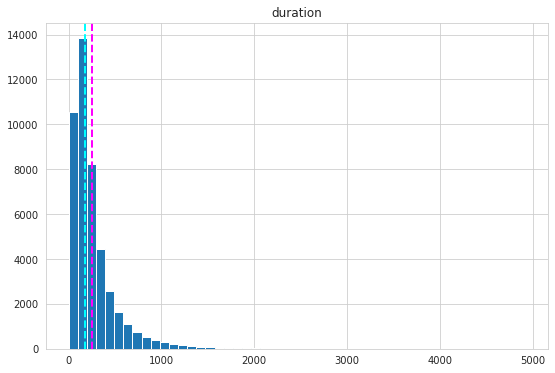

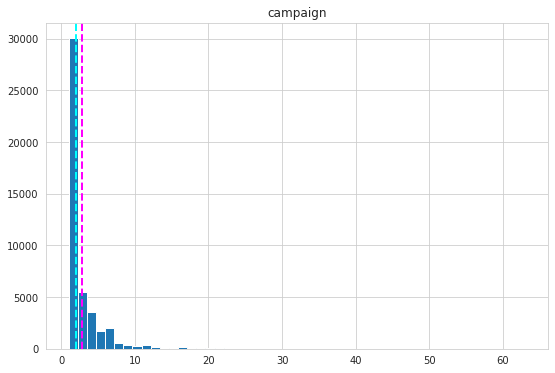

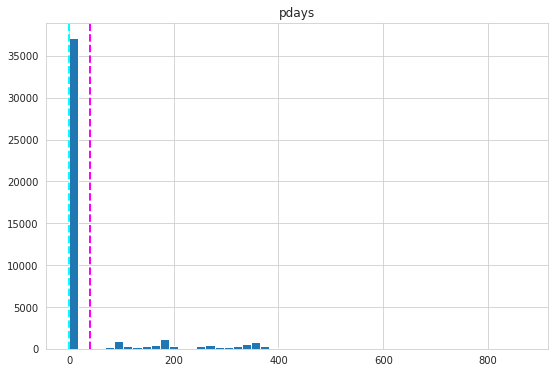

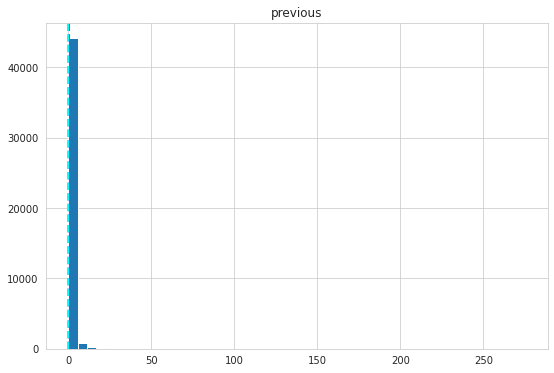

In [ ]:
numerical_col = ['age','balance', 'day','duration', 'campaign', 'pdays', 'previous']
for col in numerical_col:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  feature = df[col]
  feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()

**Observation from above plot**
 
*  We have more number of people between falling between the range of 30 and 50.
*  Maximum number of people have balance less than 3000 in their account very few people have balance greater than 5000.
*  Maximum number of people were contacted during this campaign was less then equal to 5 times.
*  Previous to this campaign maximum people were contacted is less than 4 times.



In [ ]:
df[df['previous']<4]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


**As we can see from above result maximum people were contacted was less than 4**

###**Visulaizing age and balance with respect to target variable**

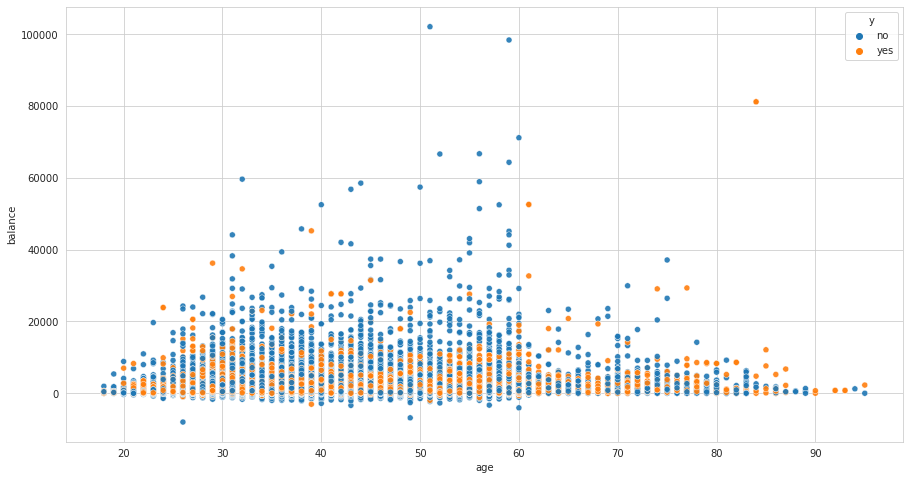

In [ ]:
#visualising age and balance with respect to whether customer has subscribed or not
fig = plt.figure(figsize=(15, 8))
sns.scatterplot(x="age", y="balance",hue='y',data=df,x_bins=50,y_bins=50,alpha=0.9)

**From above scatter plot we can see 40-60 age group people have subscribed the product. People having high balance have very low subscription rate.This also shows that our dataset have some balance below 0 and we can use this scatter plot to remove some outliers from our data set.**

###**Outlier detection on features**

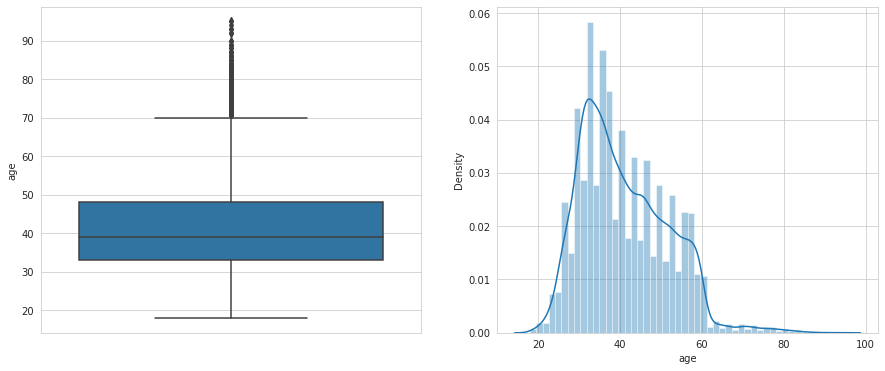

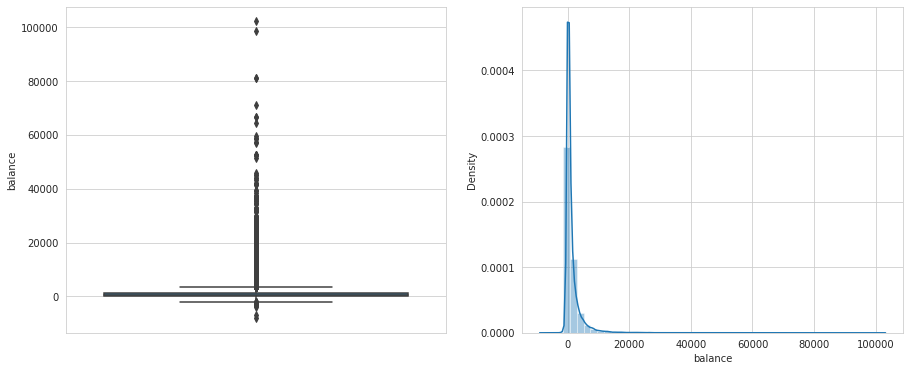

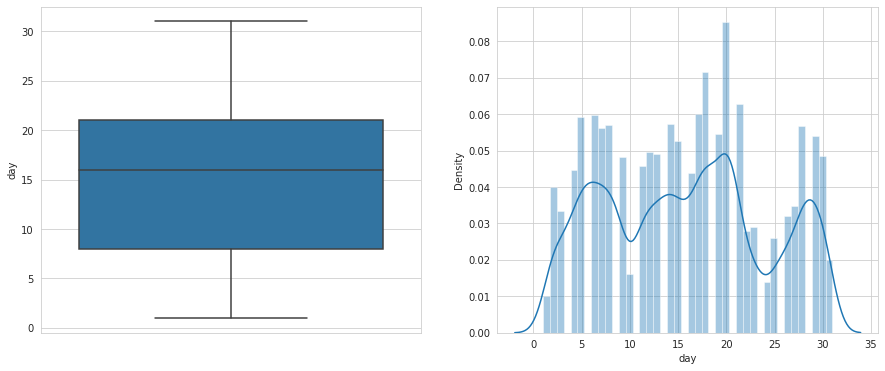

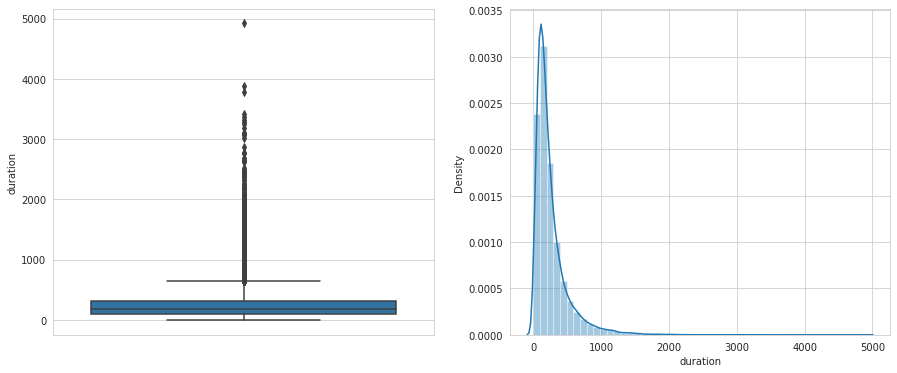

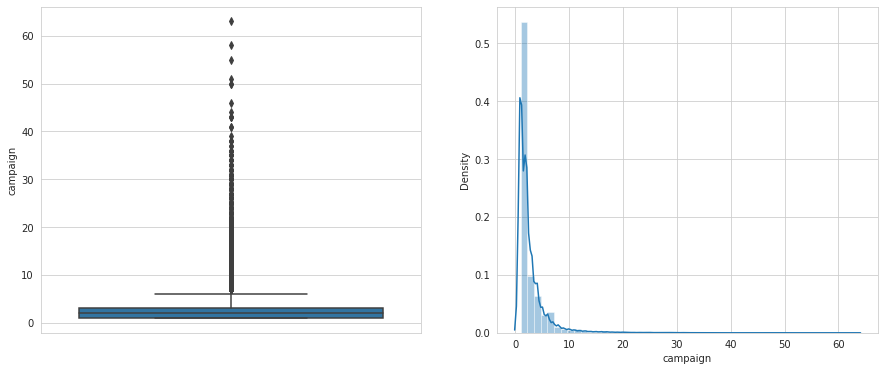

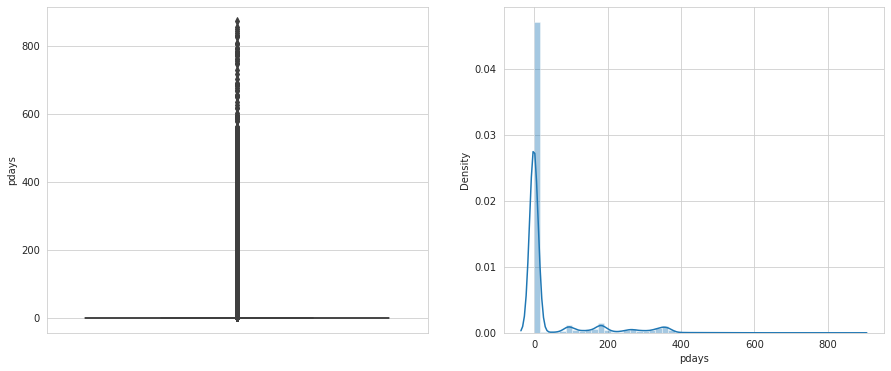

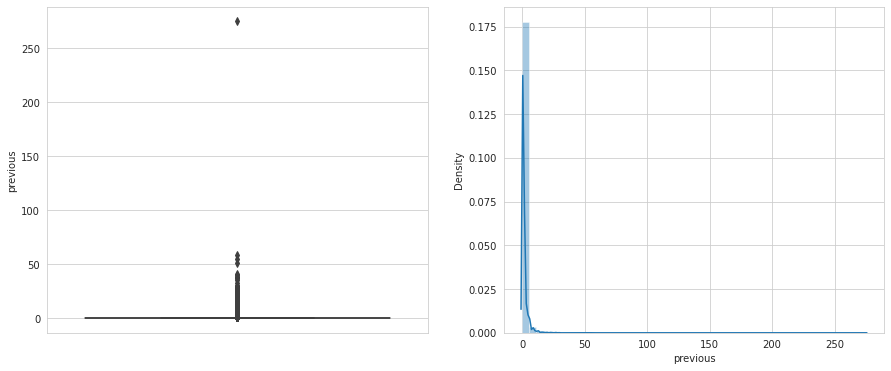

In [ ]:
for col in numerical_col:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[col])
    fig.set_title('')
    fig.set_ylabel(col)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[col].dropna())
    
    fig.set_xlabel(col)

    plt.show()

In [ ]:
df[df['pdays']<0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


**Observation:**

*  As we can see that campaign and previous having lot of outliers so we'll treat the outliers by capping them between the quantile range of 95% and 5%.
*  As age and balance are characteristics of people who were targeted during the campaign, so we'll not treat them.
*  pdays holds the number of days that passed by after the client was last contacted from a previous campaign Looking closer into 'pdays' data we can say that -1 possibly means that the client wasn't contacted before or stands for missing data.

In [ ]:
df.drop('pdays', axis=1, inplace= True)

**Also, We will drop the 'duration' variable as the value of the variable will only be known at the end of the call. Hence, at that time we will also know the outcome of the call. The 'duration' variable will lead to leakage in the data and the prediction model will not be realistic.**

In [ ]:
df.drop('duration', axis=1, inplace=True)

###**Treatment of ouliers**

In [ ]:
#Capping the outlier rows with Percentiles
upper_lim = df['campaign'].quantile(.95)
lower_lim = df['campaign'].quantile(.05)
df.loc[(df["campaign"] > upper_lim),"campaign"] = upper_lim
df.loc[(df["campaign"] < lower_lim),"campaign"] = lower_lim

In [ ]:
#Capping the outlier rows with Percentiles
upper_lim = df['previous'].quantile(.95)
lower_lim = df['previous'].quantile(.05)
df.loc[(df["previous"] > upper_lim),"previous"] = upper_lim
df.loc[(df["previous"] < lower_lim),"previous"] = lower_lim

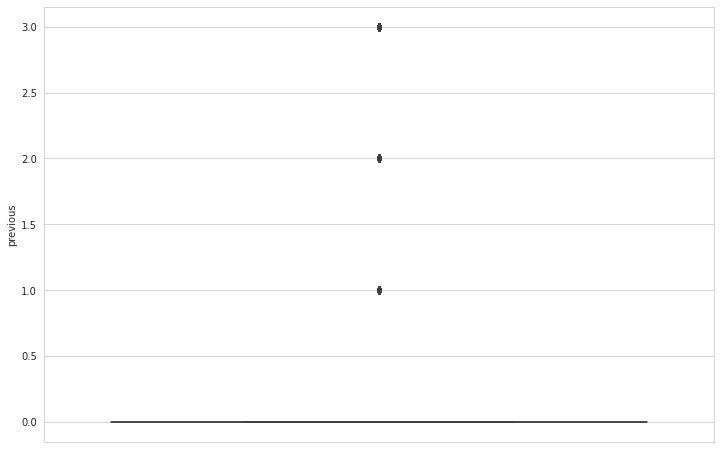

In [ ]:
plt.figure(figsize=(12,8))
fig = sns.boxplot(y=df['previous'])
fig.set_title('')
fig.set_ylabel(col)
plt.show()

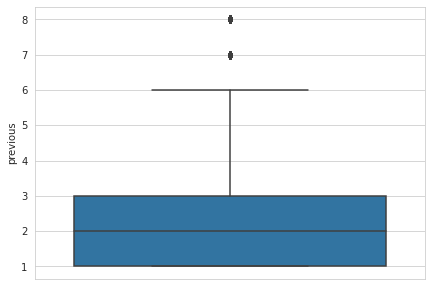

In [ ]:
fig = sns.boxplot(y=df['campaign'])
fig.set_title('')
fig.set_ylabel(col)
plt.show()

##**Feature Engineering**

In [ ]:
data= df.copy()

In [ ]:
boolean_col= ['default', 'loan', 'housing', 'y'] 

In [ ]:
boolean_col= ['default', 'loan', 'housing', 'y'] 
#changing into boolean 
for item in boolean_col:
  data[item].replace({'yes':1, 'no':0}, inplace=True)

In [ ]:
# Converting categorical variables into numeric

data['job'] = data['job'].astype('category').cat.codes
data['marital'] = data['marital'].astype('category').cat.codes
data['education'] = data['education'].astype('category').cat.codes
data['contact'] = data['contact'].astype('category').cat.codes
data['poutcome'] = data['poutcome'].astype('category').cat.codes
data['month'] = data['month'].astype('category').cat.codes
data['default'] = data['default'].astype('category').cat.codes
data['loan'] = data['loan'].astype('category').cat.codes
data['housing'] = data['housing'].astype('category').cat.codes

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int8 
 2   marital    45211 non-null  int8 
 3   education  45211 non-null  int8 
 4   default    45211 non-null  int8 
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int8 
 7   loan       45211 non-null  int8 
 8   contact    45211 non-null  int8 
 9   day        45211 non-null  int64
 10  month      45211 non-null  int8 
 11  campaign   45211 non-null  int64
 12  previous   45211 non-null  int64
 13  poutcome   45211 non-null  int8 
 14  y          45211 non-null  int64
dtypes: int64(6), int8(9)
memory usage: 2.5 MB


In [ ]:
dataset_pr = data.copy()

###**Heatmap of dataset**

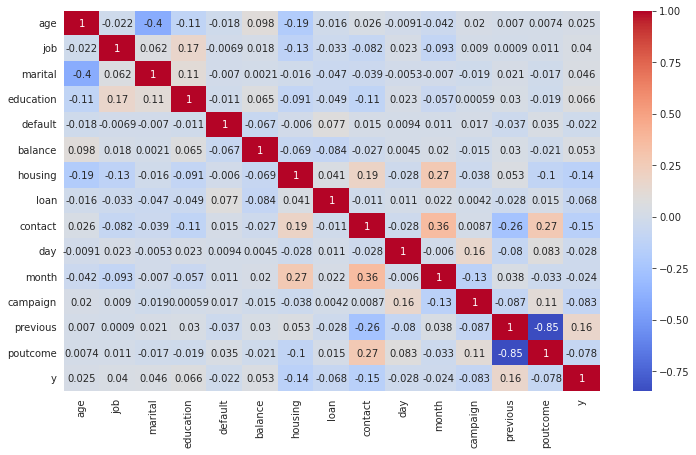

In [ ]:
#correlation heatmap
plt.figure(figsize=(12,7))
sns.heatmap(dataset_pr.corr(), cmap="coolwarm", annot=True)

###**Seperating dependent and independent variables**

In [ ]:
# Creating the dataset with all independent variables
X = dataset_pr.drop('y', axis=1)

# Creating the dataset with the dependent variable
Y = dataset_pr['y']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int8 
 2   marital    45211 non-null  int8 
 3   education  45211 non-null  int8 
 4   default    45211 non-null  int8 
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int8 
 7   loan       45211 non-null  int8 
 8   contact    45211 non-null  int8 
 9   day        45211 non-null  int64
 10  month      45211 non-null  int8 
 11  campaign   45211 non-null  int64
 12  previous   45211 non-null  int64
 13  poutcome   45211 non-null  int8 
dtypes: int64(5), int8(9)
memory usage: 2.1 MB


In [ ]:
Y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [ ]:
X.shape

(45211, 14)

In [ ]:
Y.shape

(45211,)

###**Balancing the classes using SMOTE** 

**SMOTE**(synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem.
It aims to balance class distribution by randomly increasing minority class examples by replicating them.
SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, Y)

print('Original dataset shape', len(dataset_pr))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 45211
Resampled dataset shape 79844


In [ ]:
x_smote.shape

(79844, 14)

In [ ]:
y_smote.shape

(79844,)

###**Train test split**

In [ ]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 3)

In [ ]:
# Splitting the dataset into the Training set and Test set
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [ ]:
x_train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
previous     0
poutcome     0
dtype: int64

In [ ]:
col_list=x_test.columns.tolist()

In [ ]:
#scaling our dataset for fit

sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

##**Model Implementation**

**Logistic Regression**

**KNN**


**Random Forest**

**XGBoost**











###**Applying logistic Regression**

In [ ]:
#creating hyperparameter grid for Logistic regression
log_reg_grid={'C': np.logspace(-4,4,20),
              'solver':['liblinear']}


In [ ]:
# dictionary to store accuracy and roc score for each model
score = {}

In [ ]:
#tune logistic regression
np.random.seed(42)
#setting up random search hyperparameter search for logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                scoring='roc_auc', return_train_score=True, n_jobs=-1)


# fit random search hyperparameter search for logistic regression
rs_log_reg.fit(x_train,y_train)
print('Best parameters:  {}'.format(rs_log_reg.best_params_))
print('Best score: {}'.format(rs_log_reg.best_score_))

Best parameters:  {'solver': 'liblinear', 'C': 0.0018329807108324356}
Best score: 0.8380734330182026


In [ ]:
from sklearn.metrics import log_loss
model = LogisticRegression(C=0.012742749857031334, solver='liblinear', n_jobs=-1)
model.fit(x_train, y_train)
y_probs_train = model.predict_proba(x_train)
y_probs_test = model.predict_proba(x_test)
y_predicted_train = model.predict(x_train)
y_predicted_test = model.predict(x_test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

In [ ]:
# calculate AUC and Accuracy
plt.figure(figsize=(9,7))
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
f1_s=f1_score(y_test,y_predicted_test)
p_score=precision_score(y_test,y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['Logistic Regression'] = [test_auc, test_acc,f1_s,p_score]



**************************************************
Train AUC: 0.838
Test AUC: 0.841
**************************************************
Train Accuracy: 0.758
Test Accuracy: 0.761


<Figure size 648x504 with 0 Axes>

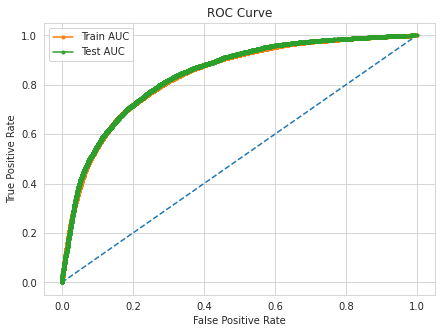

In [ ]:
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.rcParams['figure.figsize'] = (7,5)
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

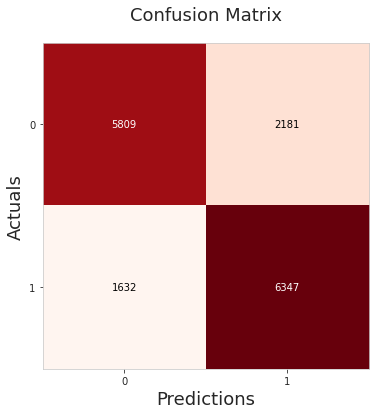

In [ ]:

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_predicted_test)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Reds)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_predicted_test , target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.78      0.73      0.75      7990
     class 1       0.74      0.80      0.77      7979

    accuracy                           0.76     15969
   macro avg       0.76      0.76      0.76     15969
weighted avg       0.76      0.76      0.76     15969



###**Applying KNN classifier**

In [ ]:
knn = KNeighborsClassifier(n_jobs=-1)
k_range = list(range(8, 11))
param_distributions = dict(n_neighbors=k_range)
clf = RandomizedSearchCV(knn, param_distributions, cv=2, scoring='roc_auc', random_state=42, n_jobs=-1, return_train_score=True, verbose= True)
clf.fit(x_train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best parameters:  {'n_neighbors': 10}
Best score: 0.8970041782251177


In [ ]:
model = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
model.fit(x_train, y_train)
y_probs_train = model.predict_proba(x_train)
y_probs_test = model.predict_proba(x_test)
y_predicted_train = model.predict(x_train)
y_predicted_test = model.predict(x_test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]



In [ ]:
# calculate AUC and Accuracy
plt.figure(figsize=(9,7))
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
f1_s= f1_score(y_test,y_predicted_test)
p_score=precision_score(y_test,y_predicted_test)

print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['KNN'] = [test_auc, test_acc,f1_s,p_score]



**************************************************
Train AUC: 0.946
Test AUC: 0.910
**************************************************
Train Accuracy: 0.865
Test Accuracy: 0.839


<Figure size 648x504 with 0 Axes>

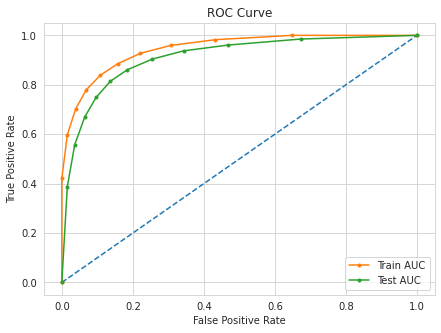

In [ ]:
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
print(classification_report(y_test,y_predicted_test))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      7990
           1       0.86      0.81      0.83      7979

    accuracy                           0.84     15969
   macro avg       0.84      0.84      0.84     15969
weighted avg       0.84      0.84      0.84     15969



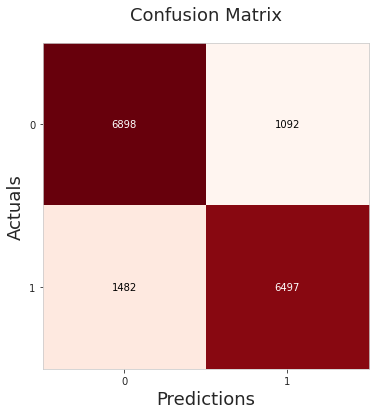

In [ ]:
#Plotting the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_predicted_test)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Reds)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

###**Applying Random Forest**

In [ ]:
params = {'n_estimators':[75, 100, 250, 500], 'max_depth':[3, 5, 10, 15, 25]}
model = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
clf = RandomizedSearchCV(model, param_distributions=params, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1, return_train_score=True)
clf.fit(x_train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'n_estimators': 250, 'max_depth': 25}
Best score: 0.959853789579055


In [ ]:
model1 = RandomForestClassifier(n_estimators=250, max_depth=25, n_jobs=-1)
model1.fit(x_train, y_train)
y_probs_train = model1.predict_proba(x_train)
y_probs_test = model1.predict_proba(x_test)
y_predicted_train = model1.predict(x_train)
y_predicted_test = model1.predict(x_test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]



In [ ]:
# calculate AUC and Accuracy
plt.figure(figsize=(9,7))
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
f1_s= f1_score(y_test,y_predicted_test)
p_score=precision_score(y_test,y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['Random Forest'] = [test_auc, test_acc,f1_s,p_score]


**************************************************
Train AUC: 1.000
Test AUC: 0.962
**************************************************
Train Accuracy: 0.999
Test Accuracy: 0.904


<Figure size 648x504 with 0 Axes>

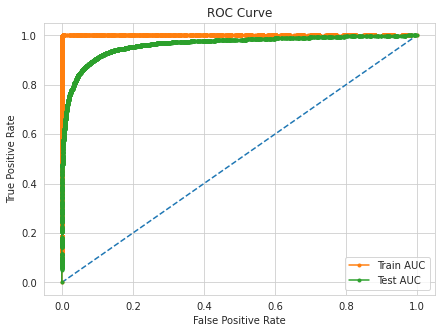

In [ ]:
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
print(classification_report(y_test,y_predicted_test))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      7990
           1       0.90      0.91      0.90      7979

    accuracy                           0.90     15969
   macro avg       0.90      0.90      0.90     15969
weighted avg       0.90      0.90      0.90     15969



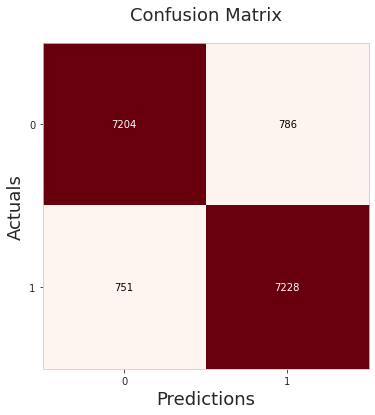

In [ ]:
#Plotting the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_predicted_test)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Reds)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

###**Applying XGBoost classifier**

In [ ]:
#using XGBoost in RandomizedSearch to get best result

folds = 3
param_comb = 5
prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}    
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

xgb=XGBClassifier()

#xgb.fit(X_train, y_train)
random_search = RandomizedSearchCV(xgb,param_distributions= prams ,n_iter=param_comb, scoring='roc_auc', n_jobs=4, verbose=3, random_state=1001 )
random_search.fit(x_train, y_train)
y_probs_train = random_search.predict_proba(x_train)
y_probs_test = random_search.predict_proba(x_test)
y_predicted_train = random_search.predict(x_train)
y_predicted_test = random_search.predict(x_test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]



Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
# calculate AUC and Accuracy
plt.figure(figsize=(9,7))
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
f1_s= f1_score(y_test,y_predicted_test)
p_score=precision_score(y_test,y_predicted_test)

print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['XGBoost'] = [test_auc, test_acc,f1_s,p_score]



**************************************************
Train AUC: 0.967
Test AUC: 0.950
**************************************************
Train Accuracy: 0.902
Test Accuracy: 0.885


<Figure size 648x504 with 0 Axes>

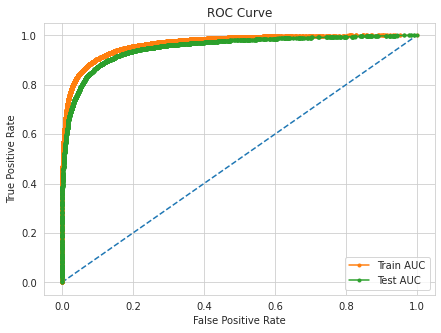

In [ ]:
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
print(classification_report(y_test,y_predicted_test))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7990
           1       0.89      0.87      0.88      7979

    accuracy                           0.89     15969
   macro avg       0.89      0.89      0.89     15969
weighted avg       0.89      0.89      0.89     15969



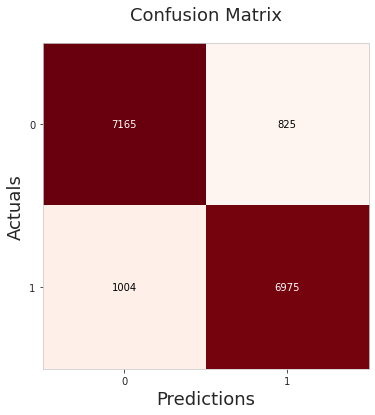

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_predicted_test)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Reds)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

###**Feature Importance**

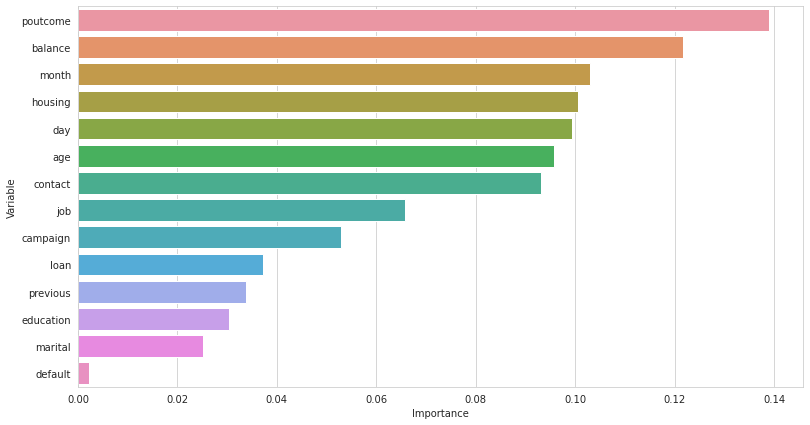

In [ ]:
#visualising feature importance of XGB
plt.figure(figsize=(13,7))
feature_imp = pd.DataFrame({"Variable": col_list,"Importance": model1.feature_importances_})
feature_imp.sort_values(by="Importance", ascending=False, inplace = True)
sns.barplot(x=feature_imp['Importance'], y= feature_imp['Variable'])

## **Conclusion**

*** It was a great learning experience working on a Bank dataset.**

*** Our dataset consist of categorical and numerical features.**

*** We have 16 independent features, out of these only half of them are important.** 

*** poutcome: outcome of the previous marketing campaign in which success was made.**

*** So basically those clients who had taken the product in the last campaign should be focussed more as they have high probability of taking term deposit**

*** Those who have Cellular contact communication type are in very high probability of taking term deposit.**

*** Most of the folks who have taken the term deposit had been talked last time in month of March,which is not making sense techniqually.But we can say that it may be due to March month is last month of financial year.**

*** XGBoost is showing the best Accuracy, Precision, Recall and very good Train and Test score with Low BIAS and Low VARIANCE.**

*** Different models are summarized in table below.** 

In [ ]:
print('***************  Comparison of different models  ****************')
table = PrettyTable(['Model', 'Test AUC', 'Test Accuracy','F1_score','Precision'])
for item in score.items():
    table.add_row([item[0], item[1][0], item[1][1], item[1][2], item[1][3]])
print(table)

***************  Comparison of different models  ****************
+---------------------+--------------------+--------------------+--------------------+--------------------+
|        Model        |      Test AUC      |   Test Accuracy    |      F1_score      |     Precision      |
+---------------------+--------------------+--------------------+--------------------+--------------------+
| Logistic Regression | 0.8405096074316483 | 0.7612248731918091 | 0.769007087902102  | 0.7442542213883677 |
|         KNN         | 0.9101507461466826 | 0.8388126996054857 | 0.8346608427543679 | 0.8561075240479642 |
|    Random Forest    | 0.9623746925792847 | 0.9037510175965934 | 0.9038954542612393 | 0.9019216371350137 |
|       XGBoost       | 0.9503101696396092 | 0.8854655895798109 | 0.8840864440078585 | 0.8942307692307693 |
+---------------------+--------------------+--------------------+--------------------+--------------------+


# **Random Forest and XGBoost are performing good among all the other models.**

#**THANK YOU**